IMPORTANT NOTE:
----------------------
This is a SAGE notebook whose syntax is similar to python but it is optimised towards mathematical uses, it requires SAGE kernel to run so DO NOT run this in Python Kernel. I have used SAGE instead of Scipy because of its ease of use. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
h=0.677;Odm=0.11928/h**2;Om=0.3106;Or=4.15*10**(-5)/(h**2);Ol=0.6894;aeq=4.15*10**(-5)/(Om*h**2);H0=100*h;c=3e+8;Mpc=3.086e+22

In [3]:
def CosmoBoltzmannSolverMax(k,N=500):
    h=0.677;Odm=0.11928/h**2;Om=0.3106;Or=4.15*10**(-5)/(h**2);Ol=0.6894;aeq=4.15*10**(-5)/(Om*h**2);H0=100*h*1000/Mpc
    from sage.calculus.desolvers import desolve_odeint
    a,Theta_r0,Phi,v,delta,Theta_r1 = var('a,Theta_r0,Phi,v,delta,Theta_r1')
    H= lambda a: H0*sqrt(Om/a**3+Or/a**4+Ol+(1-Om-Or-Ol)/a**2)
    lst1=[(-2*H0**2*Or/(a**5*H(a)**2)*Theta_r0+(1/a+k**2/(3*a**3*H(a)**2))*Phi-H0**2*Odm/(2*a**4*H(a)**2)*delta-k/(a**2*H(a))*Theta_r1),
        (2*H0**2*Or/(a**5*H(a)**2)*Theta_r0-(1/a+k**2/(3*a**3*H(a)**2))*Phi+H0**2*Odm/(2*a**4*H(a)**2)*delta),
        -k/(a**2*H(a))*Phi-v/a,
        -6*H0**2*Or/(a**5*H(a)**2)*Theta_r0+(3/a+k**2/(1*a**3*H(a)**2))*Phi-k*v/(a**2*H(a))-3*H0**2*Odm/(2*a**4*H(a)**2)*delta,
        (k/(3*a**2*H(a))*Theta_r0-k/(3*a**2*H(a))*Phi)]

    times=np.logspace(-20,0,N)
    sol = desolve_odeint(lst1, [1/3,1,0,1,0], times,dvars=[Theta_r0,Phi,v,delta,Theta_r1])   
    return(times,sol)

In [4]:
times1,sol1=CosmoBoltzmannSolverMax(0.001/Mpc*c)

In [5]:
times2,sol2=CosmoBoltzmannSolverMax(0.01/Mpc*c)

In [6]:
times3,sol3=CosmoBoltzmannSolverMax(0.1/Mpc*c)

In [20]:
times4,sol4=CosmoBoltzmannSolverMax(2/Mpc*c,10000)

<>:8: DeprecationWarning: invalid escape sequence '\P'
<>:8: DeprecationWarning: invalid escape sequence '\P'
/tmp/ipykernel_1146/3431423434.py:8: DeprecationWarning: invalid escape sequence '\P'
  plt.ylabel('$\Phi(k,\eta)/\Phi(k,0)$')


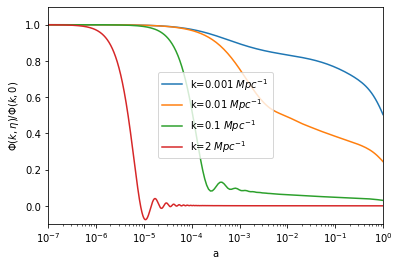

In [27]:
plt.plot(times1,sol1[:,1]/sol1[:,1][100],label='k=0.001 $Mpc^{-1}$')
plt.plot(times2,sol2[:,1]/sol2[:,1][100],label='k=0.01 $Mpc^{-1}$')
plt.plot(times3,sol3[:,1]/sol3[:,1][100],label='k=0.1 $Mpc^{-1}$')
plt.plot(times4,sol4[:,1]/sol4[:,1][500],label='k=2 $Mpc^{-1}$')
plt.ylim(-0.1,1.1)
plt.xlim(1e-7,1)
plt.xlabel('a')
plt.ylabel('$\Phi(k,\eta)/\Phi(k,0)$')
plt.xscale('log')
plt.legend()
plt.savefig('phi_LSODA.pdf')

<>:10: DeprecationWarning: invalid escape sequence '\d'
<>:10: DeprecationWarning: invalid escape sequence '\d'
/tmp/ipykernel_1146/3857219947.py:10: DeprecationWarning: invalid escape sequence '\d'
  plt.ylabel('$\delta(k,\eta)/\Phi(k,0)$')


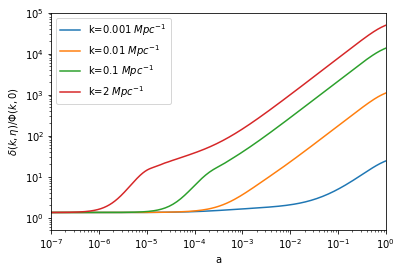

In [28]:
plt.plot(times1,sol1[:,3],label='k=0.001 $Mpc^{-1}$')
plt.plot(times2,sol2[:,3],label='k=0.01 $Mpc^{-1}$')
plt.plot(times3,sol3[:,3],label='k=0.1 $Mpc^{-1}$')
plt.plot(times4,sol4[:,3],label='k=2 $Mpc^{-1}$')
plt.ylim(0.5,1e+5)
plt.xlim(1e-7,1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('a')
plt.ylabel('$\delta(k,\eta)/\Phi(k,0)$')
plt.legend()
plt.savefig('del_LSODA.pdf')